In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
housing_price_data = pd.read_csv("data/kaggle_housing_price.csv")

In [3]:
housing_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 解析対象

target_col = 'SalePrice'
feature_cols = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

Y = np.array(housing_price_data[target_col])
X = housing_price_data[feature_cols].values

In [5]:
# ホールドアウト

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
def show_graphs(y, y_pred):
    fig = plt.figure()
    plt.scatter(y, y_pred)
    plt.title('MSE')
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.show()

    error_rate = (y - y_pred) / y
    plt.hist(error_rate, color='red', label="Error rate")  
    plt.title('MSE: (Actual - Predicted) / Actual')
    plt.ylabel('Count')
    plt.legend()
    plt.show()    

LinearRegression
MSE: 1629590868.1178381


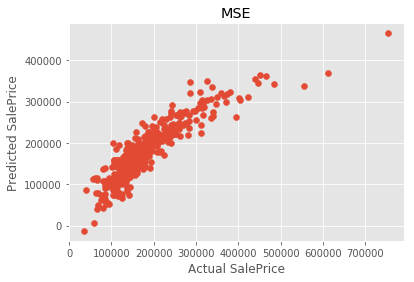

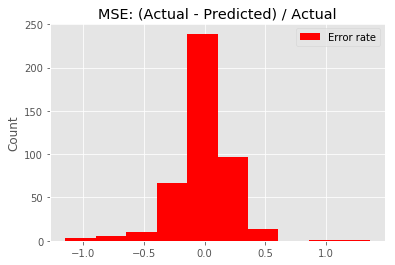

In [7]:
print("LinearRegression")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print('MSE:', mse)

y_test_pred = lr_model.predict(X_test)
show_graphs(y_test, y_test_pred)

DecisionTreeRegressor
MSE: 3810738.6767775607


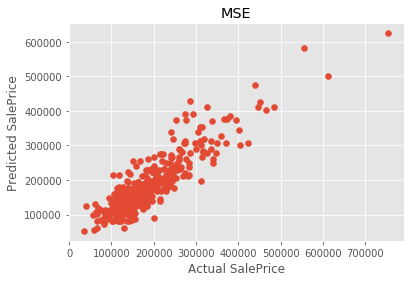

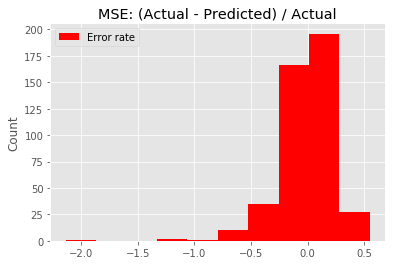

In [8]:
print('DecisionTreeRegressor')

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print('MSE:', mse)

y_test_pred = regressor.predict(X_test)
show_graphs(y_test, y_test_pred)

RandomForestRegressor
MSE: 1884438831.9688277


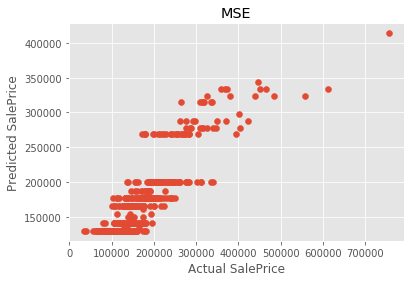

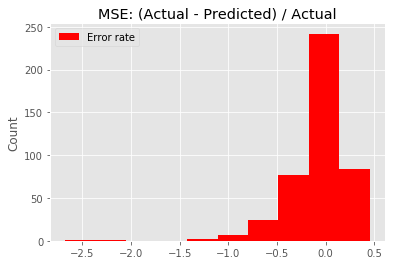

In [9]:
print('RandomForestRegressor')

regr = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print('MSE:', mse)

y_test_pred = regr.predict(X_test)
show_graphs(y_test, y_test_pred)